# Final Assignment: Bike Sharing Demand Dataset
## Task 1: Describe the Dataset
1. Read the CSV file with pandas.read_csv and parse the datetime
column.
    - we're printing values.head() to see the first five rows of our csv file
    - values.info() could be used for general type and column declaration 


In [9]:
import pandas as pd
import numpy as np

values = pd.read_csv("day.csv")

df = pd.DataFrame({
    "target": values["cnt"],
    "datetime": pd.to_datetime(values["dteday"]),
    "weather_feature": values["weathersit"],
    "temperature_feature": values["temp"],
    "humidity_feature": values["hum"],
    "windspeed_feature": values["windspeed"],
    "season_feature": values["season"],
    "holiday_feature": values["holiday"],
    "working_day_feature": values["workingday"],
    "weekday_feature": values["weekday"]
})

df.head()

,target,datetime,weather_feature,temperature_feature,humidity_feature,windspeed_feature,season_feature,holiday_feature,working_day_feature,weekday_feature
0,985,2011-01-01,2,0.344167,0.805833,0.160446,1,0,0,6
1,801,2011-01-02,2,0.363478,0.696087,0.248539,1,0,0,0
2,1349,2011-01-03,1,0.196364,0.437273,0.248309,1,0,1,1
3,1562,2011-01-04,1,0.200000,0.590435,0.160296,1,0,1,2
4,1600,2011-01-05,1,0.226957,0.436957,0.186900,1,0,1,3


2. Report:
    - *Number of rows and columns.*
        - rows: 731
        - columns: 16
    - *Time range covered by the data.*
        - By printing the parsed date and time columns, we're getting the range of any possible data.
        - dataset from 01.01.2011 to 31.12.2012



In [10]:

print("(rows, columns):", values.shape) # => 731 rows, 16 columns
print("\nDatetime: \n", df["datetime"])


(rows, columns): (731, 16)

Datetime: 
 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: datetime, Length: 731, dtype: datetime64[ns]


- Target variable and list of feature variables (names and data types)
    - Target variable: 
        - Name: cnt / count of all currently rented bikes 
        - Type: Numeric
    -  feature variables: below

In [11]:
# values.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   target               731 non-null    int64         
 1   datetime             731 non-null    datetime64[ns]
 2   weather_feature      731 non-null    int64         
 3   temperature_feature  731 non-null    float64       
 4   humidity_feature     731 non-null    float64       
 5   windspeed_feature    731 non-null    float64       
 6   season_feature       731 non-null    int64         
 7   holiday_feature      731 non-null    int64         
 8   working_day_feature  731 non-null    int64         
 9   weekday_feature      731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 57.2 KB


- Create a variable description table

In [12]:
print("Description: \n", df.describe())

Description: 
             target             datetime  weather_feature  temperature_feature  \
count   731.000000                  731       731.000000           731.000000   
mean   4504.348837  2012-01-01 00:00:00         1.395349             0.495385   
min      22.000000  2011-01-01 00:00:00         1.000000             0.059130   
25%    3152.000000  2011-07-02 12:00:00         1.000000             0.337083   
50%    4548.000000  2012-01-01 00:00:00         1.000000             0.498333   
75%    5956.000000  2012-07-01 12:00:00         2.000000             0.655417   
max    8714.000000  2012-12-31 00:00:00         3.000000             0.861667   
std    1937.211452                  NaN         0.544894             0.183051   

       humidity_feature  windspeed_feature  season_feature  holiday_feature  \
count        731.000000         731.000000      731.000000       731.000000   
mean           0.627894           0.190486        2.496580         0.028728   
min            0.0

4. Check for:
    - *Missing values per column.*
    - *Duplicated rows (if any).*
    - there are no missing or dublicated rows

In [13]:
# Summary of missing values
print("Number of missing values:", values.isnull().sum().sum())

# Summary of dublicated rows
dRowsSum = values.duplicated(keep=False).sum().sum()
print ("dublicated rows:", dRowsSum)

Number of missing values: 0
dublicated rows: 0


## Description I
- *For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles*
    - see the results above
- *For categorical variables: show frequency tables or bar charts (e.g. distribution of seasons or weather types).*

season_feature
1    181
2    184
3    188
4    178
dtype: int64


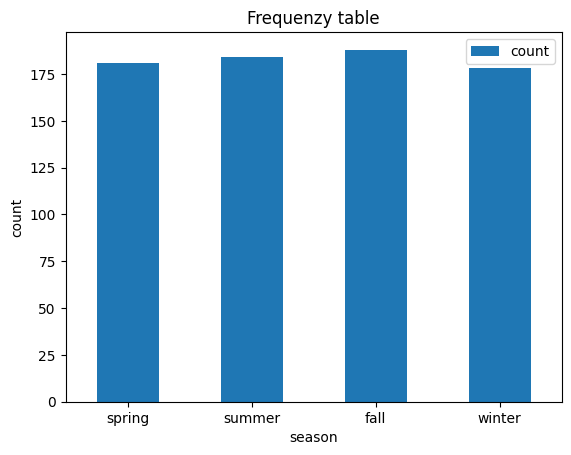

weather_feature
1    463
2    247
3     21
dtype: int64


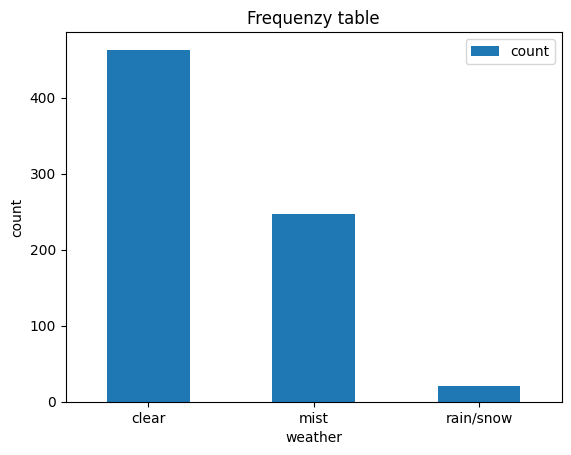

weekday_feature
0    105
1    105
2    104
3    104
4    104
5    104
6    105
dtype: int64


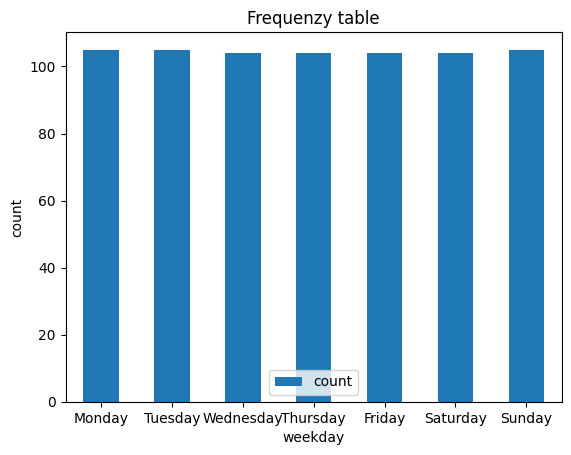

In [14]:
import matplotlib.pyplot as plt
cols = ["season_feature", "weather_feature", "weekday_feature"]    

szy = df.groupby(cols[0]).size()
print(szy)
szx = ["spring", "summer", "fall", "winter"]
df_season = pd.DataFrame({"season": szx,
             "count": szy})
ax = df_season.plot.bar(x='season', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("season")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[1]).size()
print(szy)
szx = ["clear", "mist", "rain/snow"]
df_season = pd.DataFrame({"weather": szx,
             "count": szy})
ax = df_season.plot.bar(x='weather', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weather")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[2]).size()
print(szy)
szx = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_season = pd.DataFrame({"weekday": szx,
             "count": szy})
ax = df_season.plot.bar(x='weekday', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weekday")
plt.ylabel("count")
plt.show()

## Visulisation
To plot the total bike demand over the full period, i've set the date as x value and the rent count as y value.

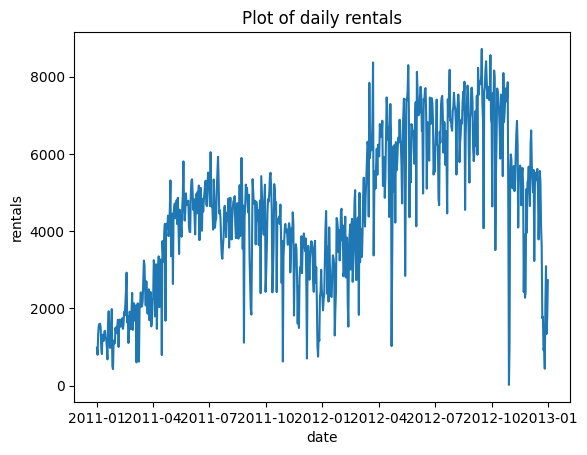

In [15]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["target"]

plt.plot(x, y)
plt.title("Plot of daily rentals")
plt.xlabel("date")
plt.ylabel("rentals")
plt.show()

distibution of numeric variables - histograms of temp, humidity, windspeed

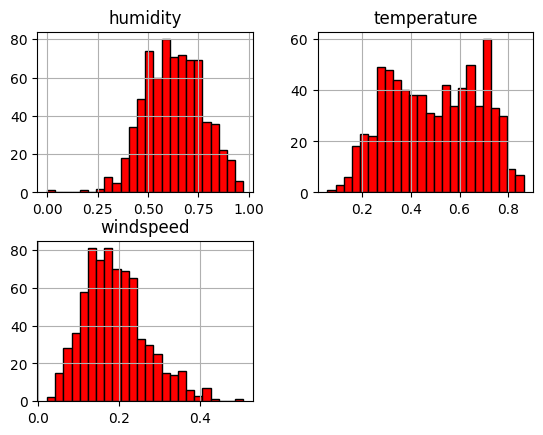

In [16]:
df_numeric = pd.DataFrame({
    "humidity": df["humidity_feature"],
    "temperature": df["temperature_feature"],
    "windspeed": df["windspeed_feature"]
})

df_numeric.hist(bins =2*12 , color = "red" ,
edgecolor = "black")
plt.show()


- *Plot aggregated demand by season, day of week or hour of day (e.g. bar charts or line plots)*

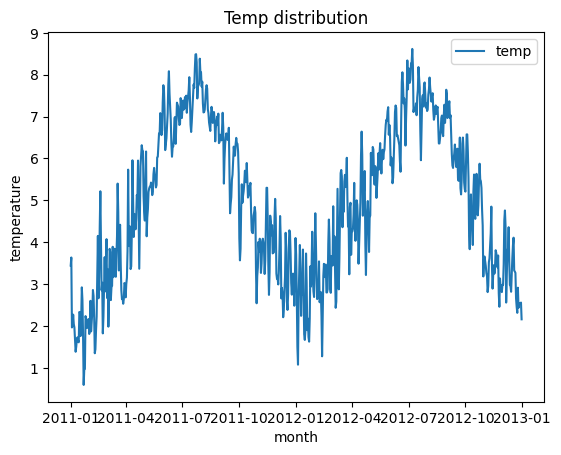

In [32]:
plt.plot(df["datetime"], df["temperature_feature"] * 10, label="temp")
plt.title("Temp distribution")
plt.xlabel("month" )
plt.ylabel( "temperature" )
plt.legend()
plt.show()


- *Write a short text summary (3–5 sentences) describing main patterns you observe (seasonality, daily patterns, influence of weather, etc.).*

During season 2 and 3, the rent business is getting the most requests. On the last chart you can see equalities between the amount of rents and the temperature (same highs and lows). Even wind could be a small factor. With less wind, more people want to rent bikes.

## Preprocessing
- *Encode categorical variables (e.g. one-hot encoding for season, weather, weekday).*
- *Split the data into training, validation and test sets (for example 70 % / 10 % / 20 %) and scale numeric features using statistics from the training set only.*

     season_feature  weather_feature  weekday_feature  temperature_feature  \
0                 1                2                6             0.344167   
1                 1                2                0             0.363478   
2                 1                1                1             0.196364   
3                 1                1                2             0.200000   
4                 1                1                3             0.226957   
..              ...              ...              ...                  ...   
726               1                2                4             0.254167   
727               1                2                5             0.253333   
728               1                2                6             0.253333   
729               1                1                0             0.255833   
730               1                2                1             0.215833   

     humidity_feature  windspeed_feature  holiday_feature  \
0 

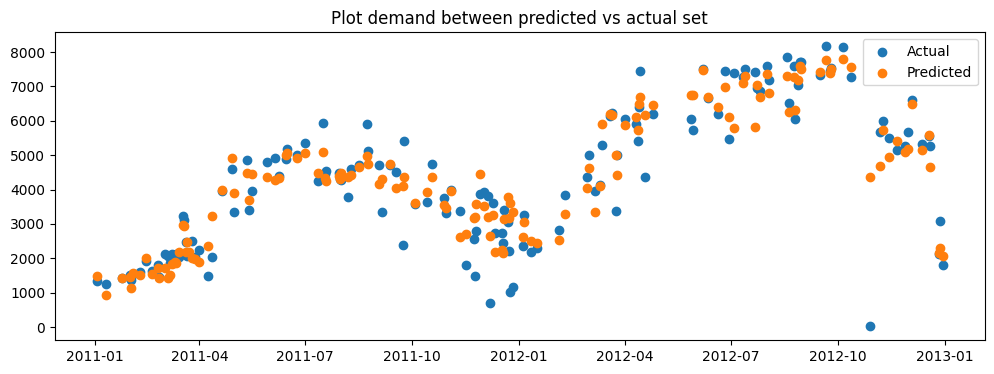

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
# encode categorical features
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"]
# onehot encoding 
df_categorical_encoded = pd.get_dummies(df[cols], dtype=int)
df_numeric = df[features]

df_features = pd.concat([df_categorical_encoded, df_numeric, pd.to_numeric(df["datetime"])], axis=1)
print(df_features)

# splitting data
from sklearn.model_selection import train_test_split
rand = 42
X = df_features
y = df["target"]
x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.125, random_state=rand)

# train model
model = RandomForestRegressor(random_state=rand)
model.fit(x_train, y_train)

# evaluation
y_pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

print(y_test)

plt.figure(figsize=(12,4))
plt.scatter(pd.to_datetime(x_test["datetime"]), y_test, label="Actual")
plt.scatter(pd.to_datetime(x_test["datetime"]), y_pred, label="Predicted")
plt.legend()
plt.title("Plot demand between predicted vs actual set")
plt.show()

## User-input predicition function
- Implement a Python function (or cell) that:
    - Accepts user inputs (e.g. season, weather, temp, humidity,windspeed, hour, weekday, is_holiday, is_workingday).
    - Applies the same preprocessing and scaling steps.
    - Uses the trained model to output a predicted count of bikes

In [106]:
def user_input_prediction(
        season, 
        weather, 
        temp, 
        humidity, 
        windspeed, 
        weekday, 
        is_holiday, 
        is_workingday, 
        date):
    # todo use trained model to output predicition on bike demand
    new_df = pd.DataFrame({
        "season_feature": [season],
        "weather_feature": [weather],
        "weekday_feature": [weekday],
        "temperature_feature": [temp],
        "humidity_feature": [humidity],
        "windspeed_feature": [windspeed],
        "holiday_feature": [is_holiday],
        "working_day_feature": [is_workingday],
        "datetime": date
    })
    pred = model.predict(new_df)
    print(pred)


user_input_prediction(
    2, # summer
    1, # clear weather
    0.6,
    0.1,
    1.0,
    6, # Sunday
    1, # holiday
    0,
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    1, # spring
    1, # clear weather
    0.138333,
    0.434167,
    0.36195,
    3, # Thursday
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    4, # Winter
    4, # snow
    0.0,
    1.0,
    1.0,
    0, # Monday 
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

[2548.14]
[1454.03]
[843.08]


- *Demonstrate several example predictions for different scenarios and briefly interpret the results.*

1. Summer time with good weather and other perfect conditions
    - the model predicted a high rent rate
2. Good weather as well, but in spring and a working day
    - worse conditions compared to the first
    - less rents predicted compared to the first prediction
3. Very worse conditions
    - model predicted less rents than the upper scenarios

With that bad conditions from scenario 3, we would expect, that the model predicts even less rents on that day. But it tends very to good predictions, on that small amount of training data. 

## 3. 30-Day-Forecast

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
# encode categorical features
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"]
# onehot encoding 
df_lag = df.copy()
df_categorical_encoded = pd.get_dummies(df_lag[cols], dtype=int)
df_numeric = df_lag[features]

df_features = pd.concat([df_categorical_encoded, df_numeric, pd.to_numeric(df_lag["datetime"])], axis=1)

# splitting data
from sklearn.model_selection import train_test_split
rand = 42
X = df_features
y = df["target"]

# time based split
n = len(X)
n_train = int(0.7 * n)
n_val = int(0.15 * n)

X_train = X[:n_train]
y_train = y[:n_train]
X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]
X_test = X[n_train + n_val :]
y_test = y[n_train + n_val :]


# lag features

for lag in [1, 7, 24, 168]:
    df_lag[f"lag_{lag}"] = df_lag["target"].shift(lag)
df_lag.dropna(inplace=True)

print(df_lag)

# scale features (norm)
X_mean, X_std = X_train.mean(0), X_train.std(0)
y_mean, y_std = y_train.mean(), y_train.std()

def norm_X(A):
    return (A - X_mean) / (X_std + 1e-8)

def norm_y(a):
    return (a - y_mean) / (y_std + 1e-8)

def denorm_y(a):
    return a * (y_std + 1e-8) + y_mean

# build model
import keras
def build_model(input_dim):
    m = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    return m

model = build_model(X_train.shape[1])

# train
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

history = model.fit(
    norm_X(X_train), norm_y(y_train),
    validation_data=(norm_X(X_val), norm_y(y_val)),
    epochs=100,
    batch_size=64,
    verbose=1
)

     target   datetime  weather_feature  temperature_feature  \
168    5119 2011-06-18                1             0.696667   
169    4744 2011-06-19                2             0.699167   
170    4010 2011-06-20                2             0.635000   
171    4835 2011-06-21                2             0.680833   
172    4507 2011-06-22                1             0.733333   
..      ...        ...              ...                  ...   
726    2114 2012-12-27                2             0.254167   
727    3095 2012-12-28                2             0.253333   
728    1341 2012-12-29                2             0.253333   
729    1796 2012-12-30                1             0.255833   
730    2729 2012-12-31                2             0.215833   

     humidity_feature  windspeed_feature  season_feature  holiday_feature  \
168          0.670417           0.119408               2                0   
169          0.666667           0.102000               2                0   


In [125]:
test_mse, test_mae = model.evaluate(
    norm_X(X_test), norm_y(y_test),
    verbose=1
)

rmse = np.sqrt(test_mse)
print("Test mae ", test_mae)
print("Test mse ", test_mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0233 - mae: 0.7135
Test mae  0.7135218977928162
Test mse  1.0232651233673096


### Forecast

In [163]:
import datetime
print(X_test)

def predict_future(x_new):

    #x_new = x_new.reshape(-1, 1)
    for lag in [1, 7, 24, 168]:
       x_new[f"lag_{lag}"] = x_new["target"].shift(lag)
    x_new.dropna(inplace=True)
    Xn = norm_X(x_new)
    y_hat = model.predict(Xn)
    return denorm_y(y_hat)


future_df = pd.DataFrame()

startdate = pd.to_datetime("2012-12-31")

for i in range (0, 30):
    
    weather = 1
    temperature = 0.19
    humidity = 0.6
    windspeed = 0.1
    season = 1
    holiday = 0
    workingday = 1
    weekday = i % 6
    future_df[i] = [
        (startdate + datetime.timedelta(days=i)).timestamp,
        weather,
        temperature,
        humidity,
        windspeed,
        season,
        holiday,
        workingday,
        weekday]


print(future_df)
y_future = predict_future(future_df)

     season_feature  weather_feature  weekday_feature  temperature_feature  \
620               3                1                3             0.599167   
621               3                1                4             0.612500   
622               3                1                5             0.633333   
623               3                1                6             0.608333   
624               3                1                0             0.580000   
..              ...              ...              ...                  ...   
726               1                2                4             0.254167   
727               1                2                5             0.253333   
728               1                2                6             0.253333   
729               1                1                0             0.255833   
730               1                2                1             0.215833   

     humidity_feature  windspeed_feature  holiday_feature  \
62

KeyError: 'target'